<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/GIS3_shop_location_on_PRCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 平面直角座標系を用いた店舗の配置
最終的に，店舗配置とその商圏からどれほどの人口を獲得できるか（顧客の可能性があるか）を検討したい。

以下では，山口県の地理情報および店舗の位置が緯度・経度で与えられることを前提として，これらを平面直角座標系 (Plane Rectangular Coordinate System）へ投影できるか，検証する。

### (準備) geopandas のインストール

In [3]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 14.8MB 303kB/s 
     |████████████████████████████████| 10.9MB 31.9MB/s 


### (準備) Google Drive のマウント

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 仮想的な店舗の配置
最初に仮想的な店舗を１店のみ考え，思い通りの位置には配置できるか／商圏を設定できるか，を確認する。

In [5]:
# 店舗の定義
import geopandas as gpd
from shapely.geometry import Point

# 北緯 34.215度，東経 131.5度に店舗を設置する
# (メモ) Point の引数は (経度, 緯度)
shop = gpd.GeoDataFrame([['shopA', Point(131.5, 34.215)]],
                        columns=['name', 'geometry'],
                        crs='EPSG:4612')

In [6]:
shop

,name,geometry
0,shopA,POINT (131.50000 34.21500)


In [7]:
market_area = shop.to_crs('EPSG:2445', inplace=False) #  平面直角座標系へ変換

# Point(131.5, 34.215) を中心に半径 1km (1000m) のポリゴンを生成
buffer_size = 5000 # 5000[m] = 5[km]
market_area['geometry'] = market_area.buffer(buffer_size)

In [8]:
market_area.crs

<Projected CRS: EPSG:2445>
Name: JGD2000 / Japan Plane Rectangular CS III
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Japan - zone III
- bounds: (130.81, 33.72, 133.49, 36.38)
Coordinate Operation:
- name: Japan Plane Rectangular CS zone III
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

(メモ) All English-speaking countries spell it "metre" except the US, which spells it "meter".

In [9]:
market_area

,name,geometry
0,shopA,"POLYGON ((-56428.625 -197811.735, -56452.701 -..."


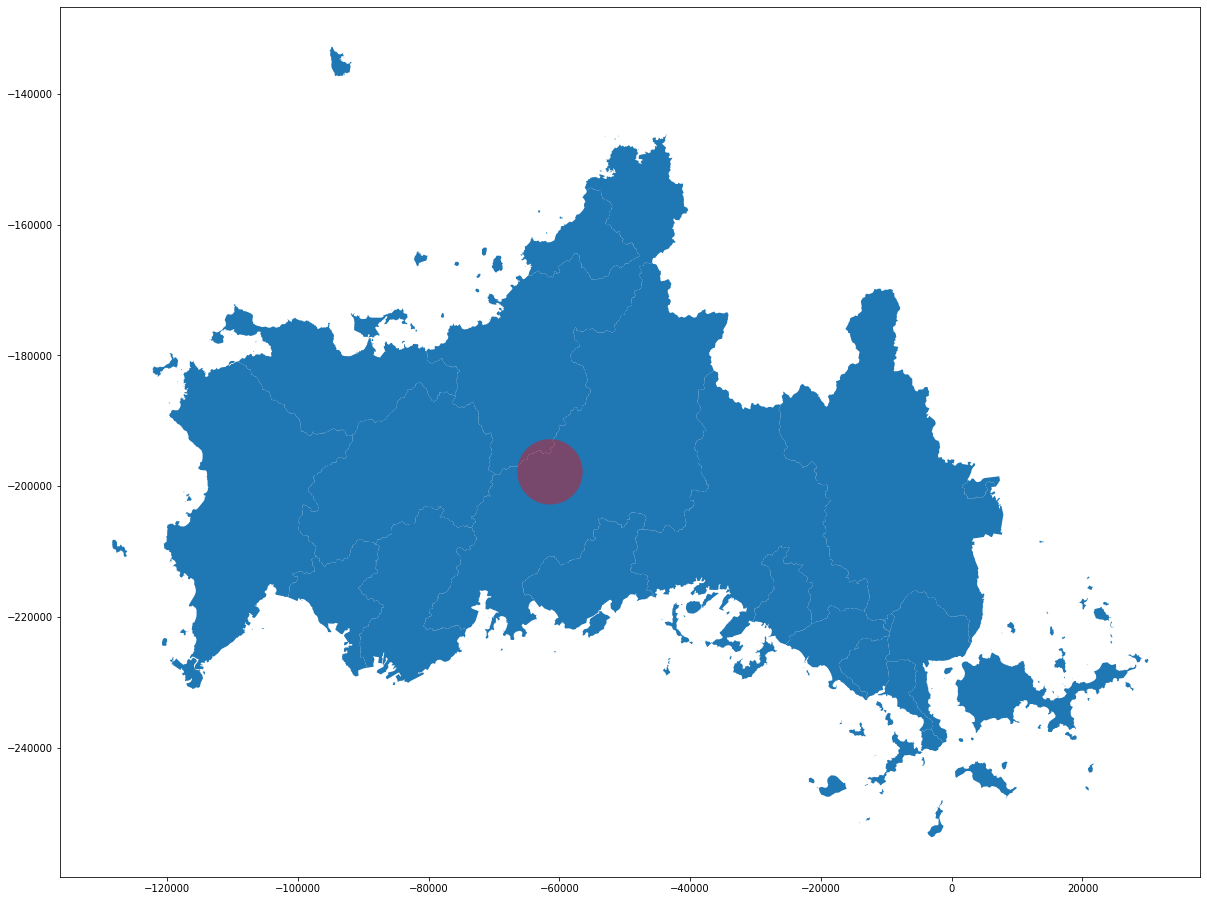

In [11]:
import matplotlib.pyplot as plt

import geopandas as gpd

# 全国市区町村界データの読み込み
path = r'/content/drive/My Drive/BASE2/GeoData/japan_ver821/japan_ver821.shp'
japan = gpd.read_file(path, encoding='shiftjis')

# 山口県のみ抽出
yamaguchi = japan[japan['KEN']=='山口県']

# 投影座標系の変換
projected_yamaguchi = yamaguchi.to_crs('EPSG:2445', inplace=False)

fig, ax = plt.subplots(1, figsize=(32, 16))
projected_yamaguchi.plot(ax=ax)
market_area.plot(ax=ax, color="red", alpha=0.4)

## 現実の店舗の配置
山口県内で展開しているスーパー・チェーン「まるき」（株式会社 丸喜）を取り上げる。

予め以下のサイトから「まるき」の各店舗の住所を調べ，ジオコーディングサービスを用いて，住所を緯度・経度情報へ変換した。その結果を maruki.xlsx に格納した。

- まるきの店舗一覧：http://marukijapan.co.jp/shops/shoplist/
- Geocoding - 住所から緯度経度を検索：https://www.geocoding.jp/

In [13]:
import pandas as pd
maruki = pd.read_excel('/content/drive/My Drive/BASE2/GeoData/maruki.xlsx')

In [14]:
maruki

,市名,店舗名,住所,緯度,経度
0,防府市,ウェスタまるき華城店,山口県防府市華園町12番31号,34.042948,131.556828
1,山口市,ウェスタまるき山口湯田店,山口市幸町584番地,34.158491,131.449315
2,山口市,まるき山口嘉川店,山口市大字江崎字和井田2703番1,34.058814,131.367455
3,山口市,ウェスタまるき山口宮野店,山口市大字宮野上字長登路1804番1,34.207288,131.513980
4,山口市,ウェスタまるき山口大内店,山口市大内千坊五丁目４番１２号,34.155754,131.492651
5,山口市,ウェスタまるき小郡店,山口市小郡新町６丁目３番１６号,34.117839,131.400971
6,宇部市,ウェスタまるき西宇部店,宇部市西宇部南3丁目４－１５,34.000193,131.220199
7,宇部市,ウェスタまるき小松原通り店,山口県宇部市若松町７－１,33.960724,131.240766
8,宇部市,ウェスタまるき楠店,宇部市大字船木字行光686-2,34.044099,131.218929
9,宇部市,ウェスタまるき東岐波店,宇部市大字東岐波字大石前1319-1,33.992832,131.347198


In [15]:
# 店舗の定義

from shapely.geometry import Point

# [[店舗名A, Point(経度A,緯度A)], [店舗名B, Point(経度B,緯度B)], [店舗名C, Point(経度C,緯度C)]] の形のリストを作る
number_of_shop = len(maruki)
shop_list = list()
for idx in range(number_of_shop):
    data = maruki.iloc[idx]
    shop_list.append([data['店舗名'], Point(data['経度'], data['緯度'])])

## Point の引数は (経度, 緯度)
shops = gpd.GeoDataFrame(shop_list,
                         columns=['name', 'geometry'], crs='EPSG:4612')

In [16]:
market_area = shops.to_crs('EPSG:2445', inplace=False) # 投影座標系の変換

# 半径 buffer_size のポリゴンを生成
buffer_size = 3000 # 3000[m] = 3[km]
market_area['geometry'] = market_area.buffer(buffer_size)

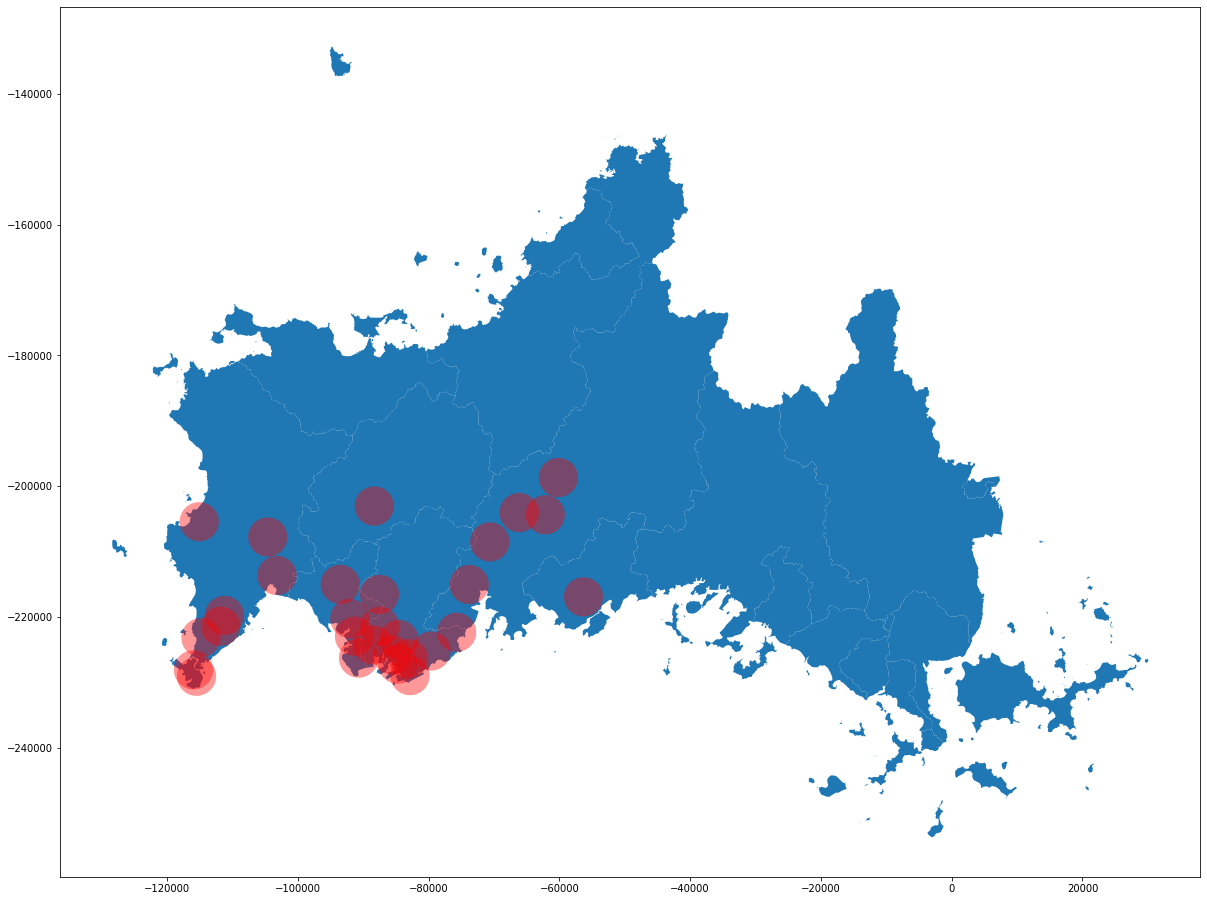

In [17]:
# 可視化
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(32, 16))
projected_yamaguchi.plot(ax=ax)
market_area.plot(ax=ax, color="red", alpha=0.4)